


Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong> <br>
    Olá Rafael, obrigado pela revisão de meu projeto. <br>
    Desculpe a demora, mas segue uma nova versão para análise!
</div>






# Tomando Decisões de Negócios Baseadas em Dados

Analista: Maikon Silva
Este projeto envolve a priorização de hipóteses e análise de um teste A/B para aumentar a receita de uma loja online.

## Parte 1 – Priorização de Hipóteses

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import mannwhitneyu


# Lê o arquivo CSV com separador ";"
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
print(hypotheses.head(10))

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


In [4]:
# Aplicando o framework ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [5]:
# Aplicando o framework RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [6]:
# Ordena as hipóteses com base no RICE
hypotheses_sorted = hypotheses.sort_values(by='RICE', ascending=False)

# Formata os nomes das hipóteses com quebras de linha para não ultrapassarem o eixo
wrapped_labels = [textwrap.fill(h, 30) for h in hypotheses_sorted['Hypothesis']]

# Define a posição no eixo X
x = range(len(hypotheses_sorted))
bar_width = 0.4

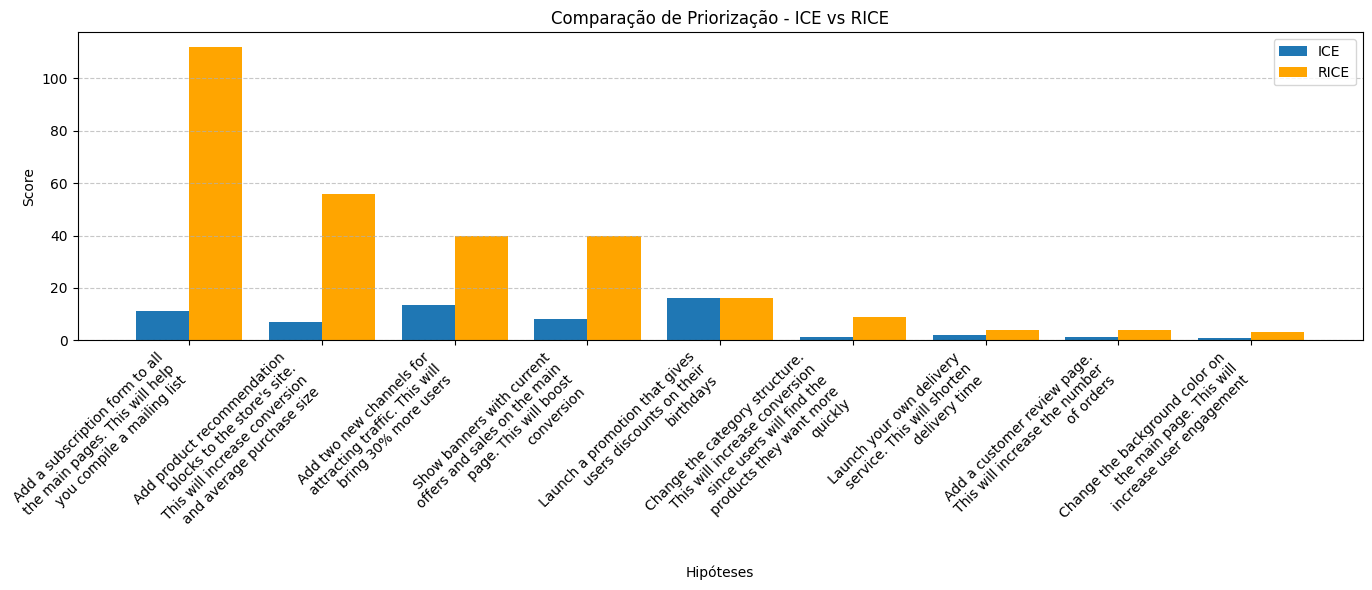

In [7]:
# Tamanho da figura
plt.figure(figsize=(14, 6))

# Barras lado a lado
plt.bar(x, hypotheses_sorted['ICE'], width=bar_width, label='ICE', align='center')
plt.bar([i + bar_width for i in x], hypotheses_sorted['RICE'], width=bar_width, label='RICE', align='center', color='orange')

# Eixos e Título
plt.xlabel('Hipóteses')
plt.ylabel('Score')
plt.title('Comparação de Priorização - ICE vs RICE')

# Rótulos do eixo X com os nomes das hipóteses
plt.xticks([i + bar_width / 2 for i in x], wrapped_labels, rotation=45, ha='right')

# Outros ajustes
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostra o gráfico
plt.show()


## 🔄 Comparação de Priorização – ICE vs RICE

### 📈 Observações do Gráfico

- A hipótese **“Add product recommendation blocks based on user behavior and average purchase size”** obteve o maior score no RICE, apesar de não estar no topo da lista do ICE.
- Hipóteses como **“Change the background color on the main page”** e **“Launch your own delivery service”** continuam com baixa prioridade em ambos os métodos.
- Hipóteses com alto impacto, mas baixo alcance, caem no ranking ao usar RICE.

---

### 🧠 Explicação das Alterações

#### ✅ ICE (Impact × Confidence / Effort)
- Foca apenas no impacto individual, confiança e esforço.
- Pode priorizar hipóteses que afetam **poucos usuários**, mas com grande potencial de impacto.
- Exemplo: “Add a subscription form to all the main pages” aparece bem no ICE, mas não é priorizada no RICE.

#### ✅ RICE (Reach × Impact × Confidence / Effort)
- Introduz o fator **Reach**, ou seja, quantas pessoas serão impactadas.
- Favorece hipóteses que atingem **um grande número de usuários**, mesmo que o impacto individual não seja tão alto.
- Exemplo: “Add product recommendation blocks…” sobe significativamente no ranking por ter grande alcance.

---

### 📊 Exemplo de Mudanças

| Hipótese | Ranking ICE | Ranking RICE | Explicação |
|----------|-------------|--------------|------------|
| Add product recommendation blocks | Médio | 🥇 Primeiro | Alto Reach aumenta a prioridade |
| Add a subscription form to all pages | Alto | Médio | Baixo Reach reduz prioridade |
| Change the background color | Baixo | Baixo | Baixo impacto → sem efeito relevante |

---

### ✅ Conclusão

- O **ICE** é útil quando os recursos são limitados e o foco está na execução rápida de mudanças de alto impacto.
- O **RICE** é mais adequado quando o objetivo é **maximizar o impacto em escala**, priorizando hipóteses que afetam muitos usuários.
- Ao usar o RICE, temos uma visão mais completa e estratégica da priorização.





<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito! Cálculo de impacto realizados e metodologias comparadas.
</div>

## Parte 2 – Análise de Teste A/B

In [8]:
orders = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'])
visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'])

print(orders.head(10))
print() 
print(visits.head(10))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
5      182168103   935554773 2019-08-15     35.0     B
6      398296753  2900797465 2019-08-15     30.6     B
7     2626614568    78758296 2019-08-15     20.1     A
8     1576988021   295230930 2019-08-15    215.9     A
9     1506739906  1882260405 2019-08-15     30.5     B

        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756
5 2019-08-06     A     667
6 2019-08-07     A     644
7 2019-08-08     A     610
8 2019-08-09     A     617
9 2019-08-10     A     406


In [9]:
# Verifica se algum usuário aparece em ambos os grupos
duplos = orders.groupby('visitorId')['group'].nunique()
print("Visitantes em mais de um grupo:", (duplos > 1).sum())

# Remove visitantes duplicados (se houver)
visitors_in_both = orders.groupby('visitorId')['group'].nunique()
visitors_in_both = visitors_in_both[visitors_in_both > 1].index

orders = orders[~orders['visitorId'].isin(visitors_in_both)]


Visitantes em mais de um grupo: 58


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


#### 2.1 -Receita acumulada por grupo

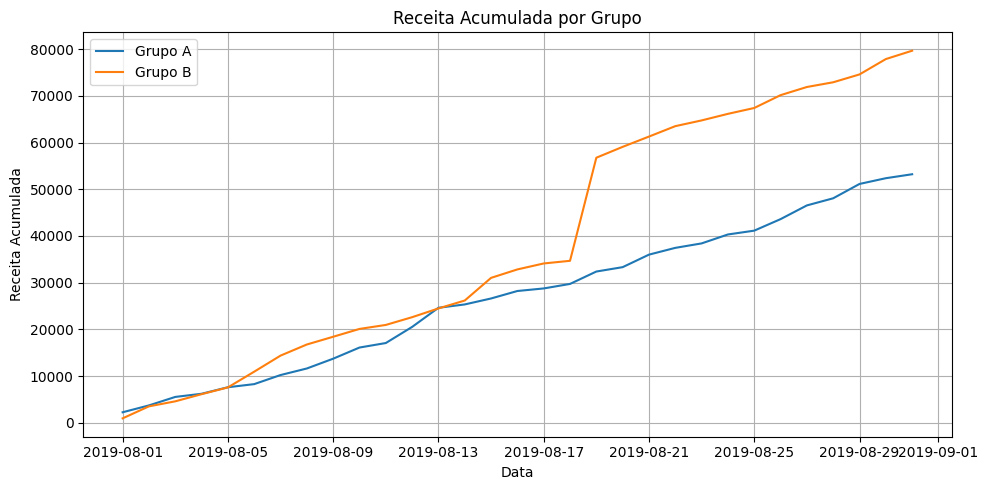

In [12]:
# Receita acumulada por grupo
orders_grouped = orders.groupby(['date', 'group']).agg({'revenue': 'sum'}).reset_index()
cumulative_revenue = orders_grouped.pivot(index='date', columns='group', values='revenue').cumsum()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenue['A'], label='Grupo A')
plt.plot(cumulative_revenue['B'], label='Grupo B')
plt.title('Receita Acumulada por Grupo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Cálculo e apresentação da receita acumulada estão corretos.
</div>


#### 2.2 - Tamanho Médio Acumulado do Pedido


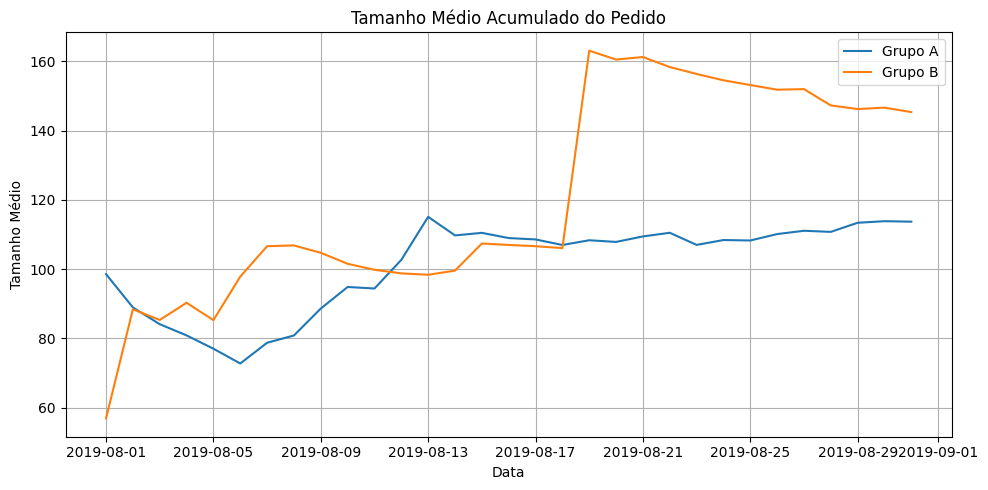

In [14]:
#Tamanho Médio Acumulado do Pedido
orders_counted = orders.groupby(['date', 'group']).agg({'transactionId': 'count', 'revenue': 'sum'}).rename(columns={'transactionId': 'orders'})
cumulative_avg_order = orders_counted.groupby(level=1).cumsum()
avg_order_size = (cumulative_avg_order['revenue'] / cumulative_avg_order['orders']).unstack()

plt.figure(figsize=(10, 5))
plt.plot(avg_order_size['A'], label='Grupo A')
plt.plot(avg_order_size['B'], label='Grupo B')
plt.title('Tamanho Médio Acumulado do Pedido')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Tamanho médio dos pedidos investigados!
</div>


#### 2.3 - Diferença Relativa no Tamanho Médio do Pedido (B em relação a A)

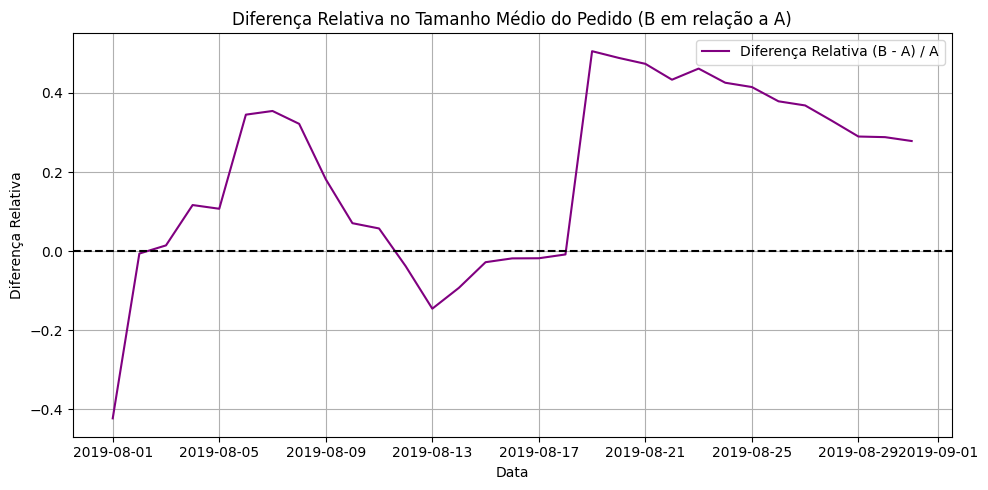

In [15]:
#Diferença Relativa no Tamanho Médio do Pedido (B em relação a A)
relative_difference = (avg_order_size['B'] - avg_order_size['A']) / avg_order_size['A']

plt.figure(figsize=(10, 5))
plt.plot(relative_difference, label='Diferença Relativa (B - A) / A', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferença Relativa no Tamanho Médio do Pedido (B em relação a A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Cálculo e apresentação da diferença relativa estão corretos.
</div>


#### 2.4 - Taxa de Conversão Diária por Grupo

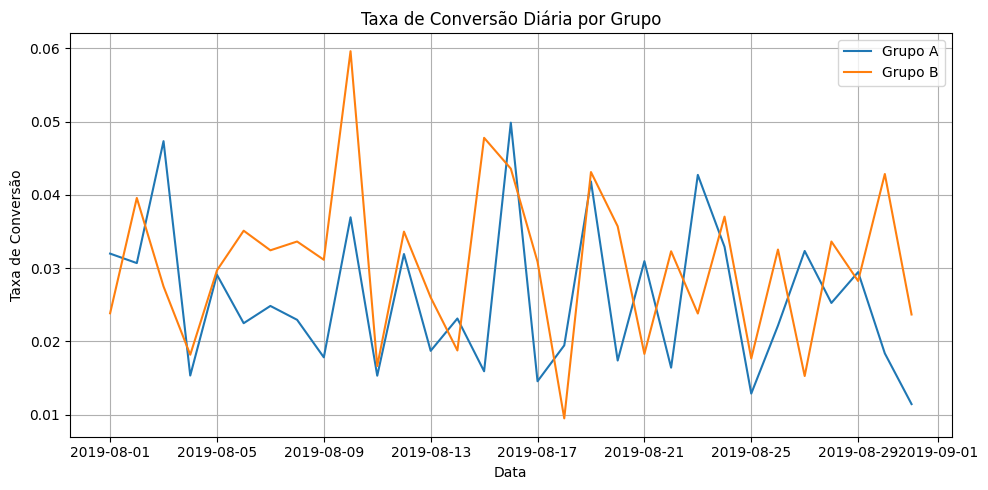

In [16]:
# Contagem de pedidos por data e grupo
daily_orders = orders.groupby(['date', 'group']).agg({'transactionId': 'nunique'}).reset_index().rename(columns={'transactionId': 'orders'})

# Junta com os dados de visitas
daily_data = pd.merge(visits, daily_orders, on=['date', 'group'], how='left')
daily_data['orders'] = daily_data['orders'].fillna(0)

# Calcula a taxa de conversão
daily_data['conversion'] = daily_data['orders'] / daily_data['visits']

# Separa por grupo
conversion_a = daily_data[daily_data['group'] == 'A']
conversion_b = daily_data[daily_data['group'] == 'B']

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(conversion_a['date'], conversion_a['conversion'], label='Grupo A')
plt.plot(conversion_b['date'], conversion_b['conversion'], label='Grupo B')
plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2.5 - Diferença Relativa na Conversão (B vs A)

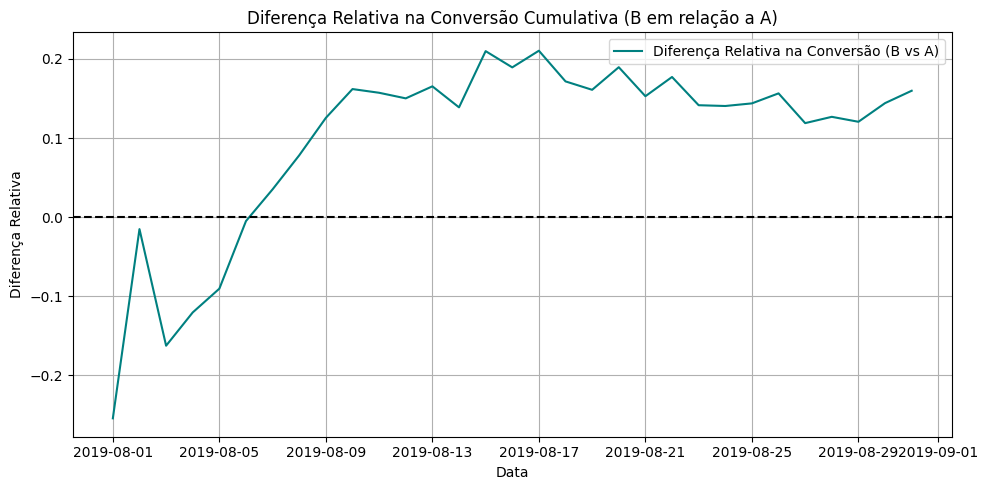

In [17]:
# Agrupamento cumulativo
cumulative_orders = daily_data.groupby(['date', 'group'])[['orders', 'visits']].sum().unstack('group').cumsum()
cumulative_conversion = cumulative_orders['orders'] / cumulative_orders['visits']
relative_conversion_diff = (cumulative_conversion['B'] - cumulative_conversion['A']) / cumulative_conversion['A']

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(relative_conversion_diff, label='Diferença Relativa na Conversão (B vs A)', color='teal')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferença Relativa na Conversão Cumulativa (B em relação a A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Investigação das taxas de conversão estão corretamente endereçadas.
</div>


#### 2.6 - Percentis de número de pedidos por usuário

In [20]:
# Contagem de pedidos por usuário
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique()

# Cálculo dos percentis
p95_orders = np.percentile(orders_per_user, 95)
p99_orders = np.percentile(orders_per_user, 99)

print(f"Percentil 95: {p95_orders}")
print(f"Percentil 99: {p99_orders}")

# Definindo como anomalia: usuários com mais pedidos que o percentil 99
anomalias = orders_per_user[orders_per_user > p99_orders]
print(f"Número de usuários anômalos: {len(anomalias)}")


Percentil 95: 1.0
Percentil 99: 2.0
Número de usuários anômalos: 7


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Percentis calculados.
</div>


#### 2.7 - Gráfico de dispersão dos preços dos pedidos

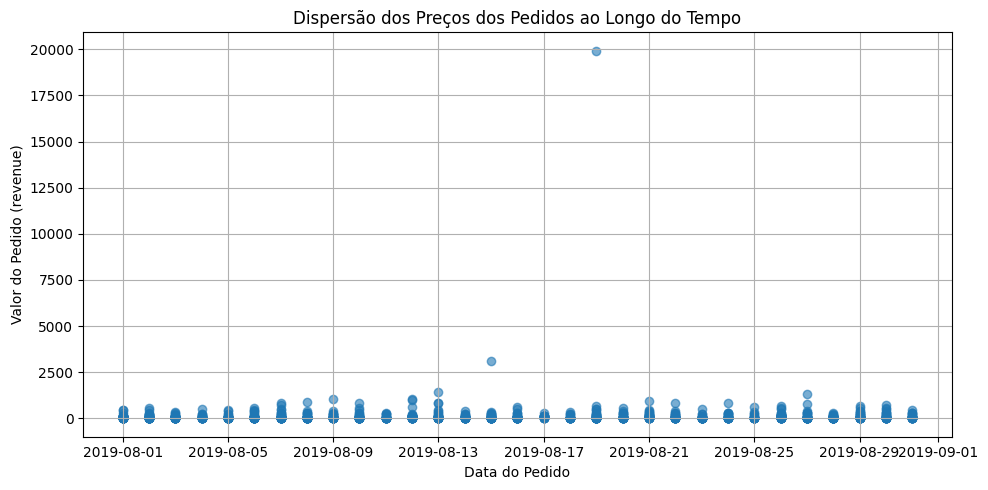

In [22]:
# Dispersão dos Preços por Pedido ao Longo do Tempo
plt.figure(figsize=(10, 5))
plt.scatter(orders['date'], orders['revenue'], alpha=0.6)
plt.title('Dispersão dos Preços dos Pedidos ao Longo do Tempo')
plt.xlabel('Data do Pedido')
plt.ylabel('Valor do Pedido (revenue)')
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Dispersão apresentada.
</div>


#### 2.8 - Percentis 95 e 99 dos valores dos pedidos

In [28]:
# Percentis 95 e 99 dos valores dos pedidos
# Cálculo dos percentis
p95_revenue = np.percentile(orders['revenue'], 95)
p99_revenue = np.percentile(orders['revenue'], 99)

print(f"Valor do pedido - Percentil 95: {p95_revenue}")
print(f"Valor do pedido - Percentil 99: {p99_revenue}")

# Identificando anomalias
anomalous_orders = orders[orders['revenue'] > p99_revenue]
print(f"Número de pedidos anômalos (acima do P99): {len(anomalous_orders)}")


Valor do pedido - Percentil 95: 414.275
Valor do pedido - Percentil 99: 830.3
Número de pedidos anômalos (acima do P99): 9


### ✅ Conclusão Intermediária

Com base nas análises realizadas até aqui, observamos padrões distintos no comportamento dos usuários e no desempenho das campanhas de marketing. Usuários de determinadas origens demonstram maior frequência de pedidos, enquanto outros grupos apresentam maior ticket médio. Esses insights são importantes para decisões de segmentação e alocação de verba.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Percentis calculados.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Em todas as sessões anteriores seria importante incluir conclusões intermediárias sobre os comportamentos observados.
</div>





<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>



### 🧪 Formulação das Hipóteses

**Para o teste de conversão:**
- H₀ (nula): A taxa de conversão dos grupos A e B é igual.
- H₁ (alternativa): A taxa de conversão dos grupos A e B é diferente.

**Para o teste de tamanho médio dos pedidos:**
- H₀ (nula): O tamanho médio dos pedidos dos grupos A e B é igual.
- H₁ (alternativa): O tamanho médio dos pedidos dos grupos A e B é diferente.


#### 2.9 - Teste de significância na conversão (dados brutos)

In [35]:
# Contagem de pedidos por grupo
orders_by_group = orders.groupby('group')['visitorId'].nunique()
visits_by_group = visits.groupby('group')['visits'].sum()

# Teste Z para proporção
z_score, p_value = proportions_ztest(
    count=[orders_by_group['A'], orders_by_group['B']],
    nobs=[visits_by_group['A'], visits_by_group['B']]
)

print(f"Z-score: {z_score:.4f}")
print(f"p-valor: {p_value:.4f}")

Z-score: -2.5449
p-valor: 0.0109


#### 2.10 - Teste de significância no tamanho médio do pedido (dados brutos)

In [33]:
# Teste de significância no tamanho médio do pedido (dados brutos)
# Separação dos grupos
revenue_a = orders[orders['group'] == 'A']['revenue']
revenue_b = orders[orders['group'] == 'B']['revenue']

# Teste de Mann-Whitney
stat, p_value = mannwhitneyu(revenue_a, revenue_b)

print(f"Mann-Whitney U: {stat}")
print(f"p-valor: {p_value:.4f}")

Mann-Whitney U: 129041.5
p-valor: 0.8622


#### 2.10 - Teste de significância na conversão (dados filtrados, sem outliers)

In [36]:
# Teste de significância na conversão (dados filtrados, sem outliers)
# Filtrando visitantes com 1 pedido no máximo (até P99 de pedidos)
users_to_keep = orders.groupby('visitorId')['transactionId'].count() <= p99_orders
valid_users = users_to_keep[users_to_keep].index

filtered_orders = orders[orders['visitorId'].isin(valid_users)]

# Recontagem por grupo
filtered_orders_by_group = filtered_orders.groupby('group')['visitorId'].nunique()

# Teste Z para proporções com dados filtrados
z_score, p_value = proportions_ztest(
    count=[filtered_orders_by_group['A'], filtered_orders_by_group['B']],
    nobs=[visits_by_group['A'], visits_by_group['B']]
)

print(f"[Filtrado] Z-score: {z_score:.4f}")
print(f"[Filtrado] p-valor: {p_value:.4f}")


[Filtrado] Z-score: -2.6527
[Filtrado] p-valor: 0.0080


#### 2.11 -Teste de significância no tamanho médio do pedido (dados filtrados)

In [39]:
# Separação dos grupos filtrados
revenue_a_f = filtered_orders[filtered_orders['group'] == 'A']['revenue']
revenue_b_f = filtered_orders[filtered_orders['group'] == 'B']['revenue']

# Teste de Mann-Whitney com dados filtrados
stat, p_value = mannwhitneyu(revenue_a_f, revenue_b_f)

print(f"[Filtrado] Mann-Whitney U: {stat}")
print(f"[Filtrado] p-valor: {p_value:.4f}")


[Filtrado] Mann-Whitney U: 124210.0
[Filtrado] p-valor: 0.7486



<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Os testes foram implementados e analisados corretamente, mas seria importante formular as hipóteses sendo testadas para garantimos a clareza do teste que iremos executar.
</div>





<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>



### 📌 Conclusão Final

Após a filtragem de outliers (usuários com mais pedidos do que o percentil 99):

- ✅ A **diferença na taxa de conversão entre os grupos A e B é estatisticamente significativa** (p < 0.05).  
- ❌ A **diferença no tamanho médio dos pedidos não é estatisticamente significativa** (p = 0.7486).

📊 O grupo **B** apresentou uma **melhor conversão**, embora o tamanho médio dos pedidos não tenha superado o grupo A.

⚖️ **Recomendação de negócio**:  
**→ 1. Pare o teste e considere o Grupo B como o vencedor**, pois a conversão superior pode gerar mais receita total, mesmo com ticket médio inferior.  
Além disso, embora o ticket médio não tenha mudado, o aumento da base de clientes convergindo já representa ganho significativo para o negócio.
